In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Simulação de dados


In [20]:
data = {
    'observationdate': pd.date_range(start='1/1/2020', periods=100),
    'confirmed': np.random.randint(0, 1000, 100),
    'deaths': np.random.randint(0, 50, 100)
}

simulação_dados = pd.DataFrame(data)

In [21]:
simulação_dados

,observationdate,confirmed,deaths
0,2020-01-01,644,23
1,2020-01-02,25,47
2,2020-01-03,857,26
3,2020-01-04,958,1
4,2020-01-05,972,45
...,...,...,...
95,2020-04-05,569,6
96,2020-04-06,123,30
97,2020-04-07,387,31
98,2020-04-08,54,46


# Função para corrigir os nomes das colunas

In [22]:
def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

df.columns = [corrige_colunas(col) for col in df.columns]

# Filtrando os dados para o Brasil (simulação)

In [23]:
dados_brasil = df.loc[df.confirmed > 0]

In [24]:
dados_brasil

,observationdate,confirmed,deaths
0,2020-01-01,169,27
1,2020-01-02,298,12
2,2020-01-03,749,32
3,2020-01-04,250,20
4,2020-01-05,974,15
...,...,...,...
95,2020-04-05,805,13
96,2020-04-06,563,11
97,2020-04-07,157,7
98,2020-04-08,118,33


# Visualização dos casos confirmados

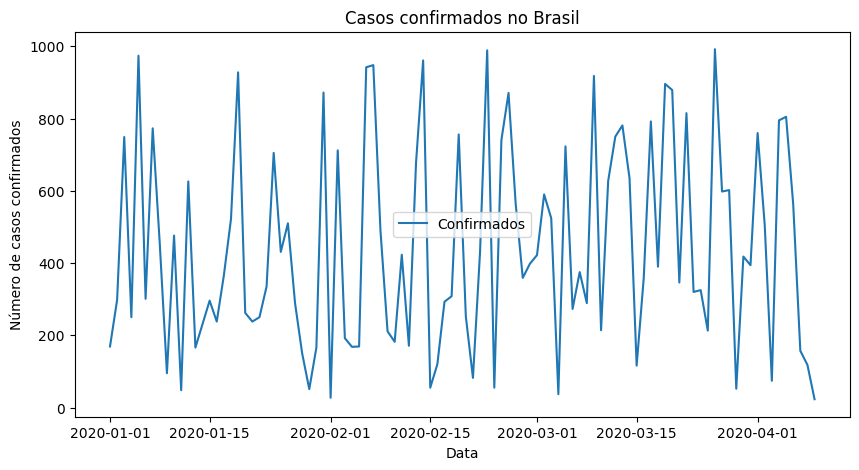

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(brasil['observationdate'], brasil['confirmed'], label='Confirmados')
plt.xlabel('Data')
plt.ylabel('Número de casos confirmados')
plt.title('Casos confirmados no Brasil')
plt.legend()
plt.show()

In [26]:
plt

<module 'matplotlib.pyplot' from '/lib/python3.12/site-packages/matplotlib/pyplot.py'>

# Contagem de novos casos diários


In [36]:
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

In [37]:
brasil

,observationdate,confirmed,deaths,fim,novoscasos
0,2020-01-01,169,27,NaN,0
1,2020-01-02,298,12,NaN,129
2,2020-01-03,749,32,NaN,451
3,2020-01-04,250,20,NaN,-499
4,2020-01-05,974,15,NaN,724
...,...,...,...,...,...
95,2020-04-05,805,13,535.857143,10
96,2020-04-06,563,11,556.571429,-242
97,2020-04-07,157,7,522.714286,-406
98,2020-04-08,118,33,431.000000,-39


# Visualização dos novos casos por dia

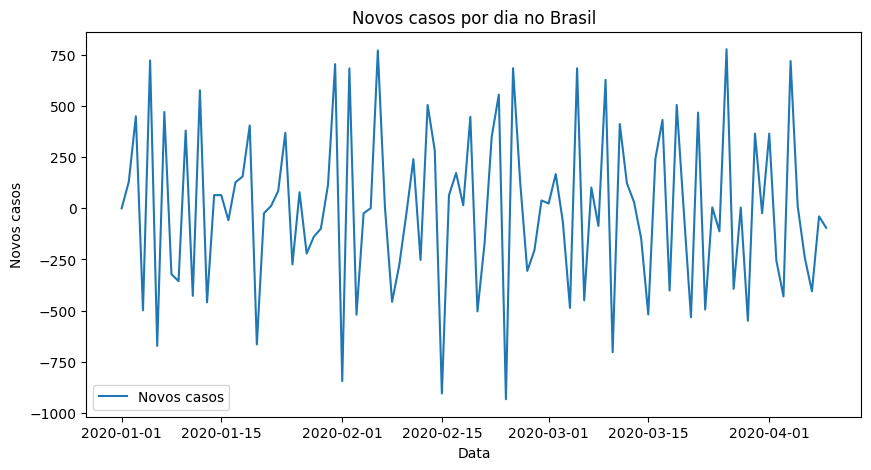

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(brasil['observationdate'], brasil['novoscasos'], label='Novos casos')
plt.xlabel('Data')
plt.ylabel('Novos casos')
plt.title('Novos casos por dia no Brasil')
plt.legend()
plt.show()

# Visualização de mortes

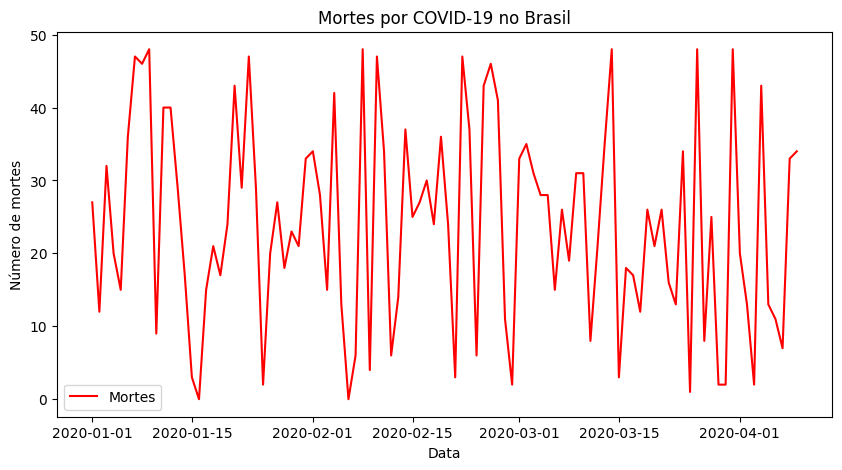

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(brasil['observationdate'], brasil['deaths'], label='Mortes', color='red')
plt.xlabel('Data')
plt.ylabel('Número de mortes')
plt.title('Mortes por COVID-19 no Brasil')
plt.legend()
plt.show()

# Taxa de crescimento de casos confirmados

In [40]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    n = (data_fim - data_inicio).days
    
    taxa = (presente/passado)**(1/n) - 1
    return taxa*100

cresc_medio = taxa_crescimento(brasil, 'confirmed')
print(f"O crescimento médio do COVID no Brasil no período avaliado foi de {cresc_medio.round(2)}%.")

O crescimento médio do COVID no Brasil no período avaliado foi de -1.99%.


# Previsão para o fim da COVID-19 (simulação simples)

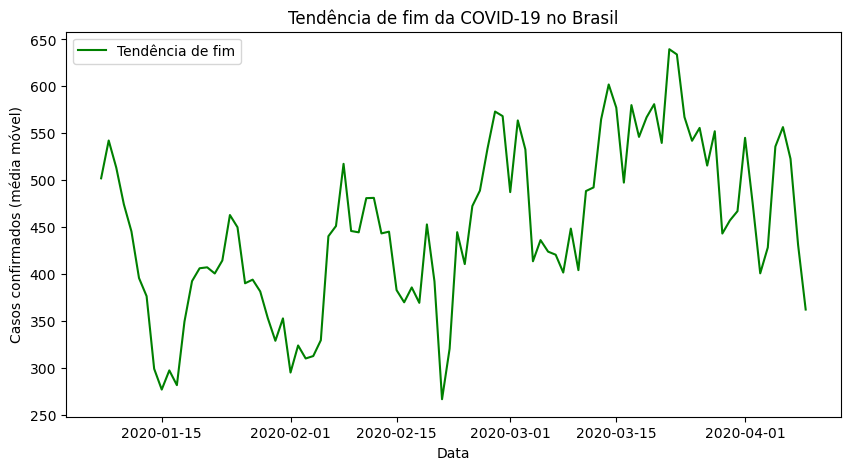

In [41]:
brasil['fim'] = brasil['confirmed'].rolling(window=7).mean()  # Média móvel dos casos confirmados

plt.figure(figsize=(10, 5))
plt.plot(brasil['observationdate'], brasil['fim'], label='Tendência de fim', color='green')
plt.xlabel('Data')
plt.ylabel('Casos confirmados (média móvel)')
plt.title('Tendência de fim da COVID-19 no Brasil')
plt.legend()
plt.show()